Vamos analisar os dados e então responderemos essas 10 perguntas:
•Pergunta de Negócio 1:Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?•Pergunta de Negócio 2:Qual o Total de Vendas Por Data do Pedido?Demonstre o resultado através de um gráfico de barras.
•Pergunta de Negócio 3:Qual o Total de Vendas por Estado?Demonstre o resultado através de um gráfico de barras.
•Pergunta de Negócio 4:Quais São as 10 Cidades com Maior Total de Vendas?Demonstre o resultado através de um gráfico de barras.
•Pergunta de Negócio 5:Qual Segmento Teve o Maior Total de Vendas?Demonstre o resultado através de um gráfico de pizza.
•Pergunta de Negócio 6 (Desafio Nível Baby):Qual o Total de Vendas Por Segmento e Por Ano?
•Pergunta de Negócio 7 (Desafio Nível Júnior):Os  gestores  da  empresa  estão  considerando conceder  diferentes  faixas  de  descontos  e gostariam de fazer uma simulação com base na regra abaixo:Se o Valor_Venda for maior que 1000 recebe 15% de desconto.Se o Valor_Venda for menor que 1000 recebe 10% de desconto.Quantas Vendas Receberiam 15% de Desconto?
•Pergunta de Negócio 8 (Desafio Nível Master):Considere  Que  a  Empresa  Decida  Conceder  o  Desconto  de  15%  do  Item  Anterior.  Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?
•Pergunta de Negócio 9 (Desafio Nível Master Ninja):Qual o Média de Vendas Por Segmento, Por Ano e Por Mês?Demonstre o resultado através de gráfico de linha.
•Pergunta de Negócio 10 (Desafio Nível Master Ninja das Galáxias):Qual o Total de Vendas Por Categoria e SubCategoria, Considerando Somente as Top 12 SubCategorias?Demonstre tudo através de um único gráfico.

importando as bibliotecas

In [1]:
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings

warnings.filterwarnings('ignore')

con = sqlite3.connect('cap12_dsa.db')

sql_query = """SELECT * FROM SampleSuperstore;"""

df = pd.read_sql_query(sql_query,con)

df.head()


/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


,id,coluna1,coluna2,coluna3,coluna4,coluna5,coluna6,coluna7,coluna8,coluna9,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,None,None,None,None,None,None,None,None,None,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,"261,96",2,0,"41,9136"
1,2,None,None,None,None,None,None,None,None,None,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...","731,94",3,0,"219,582"
2,3,None,None,None,None,None,None,None,None,None,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,"14,62",2,0,"6,8714"
3,4,None,None,None,None,None,None,None,None,None,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"957,5775",5,"0,45","-383,031"
4,5,None,None,None,None,None,None,None,None,None,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368",2,"0,2","2,5164"


In [2]:
df = df.drop(df.columns[0:22],axis=1)

In [3]:
df

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,"261,96",2,0,"41,9136"
1,2,CA-2016-152156,08/11/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...","731,94",3,0,"219,582"
2,3,CA-2016-138688,12/06/2016,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,"14,62",2,0,"6,8714"
3,4,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,"957,5775",5,"0,45","-383,031"
4,5,US-2015-108966,11/10/2015,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,"22,368",2,"0,2","2,5164"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,21/01/2014,23/01/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,"25,248",3,"0,2","4,1028"
9990,9991,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,"91,96",2,0,"15,6332"
9991,9992,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,"258,576",2,"0,2","19,3932"
9992,9993,CA-2017-121258,26/02/2017,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,92627,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""","29,6",4,0,"13,32"


In [4]:
def analise(dados):
    for i in dados.columns:
        if dados[i].dtypes == 'int'or dados[i].dtypes == 'float64':
            print(f'Nome da coluna \n {dados[i].name}')
            print(f'\n Tipo da coluna \n {dados[i].dtypes}\n')
            print(f'\n Quantidades unicas por coluna \n {dados[i].nunique()}\n')
            print(f'\n quantidades de campos nulos da coluna \n {dados[i].isnull().sum()}\n')
            print(f'\n Tipo da coluna \n {dados[i].describe()}\n')
            fig = px.box(dados[i],title=f'analise da coluna {dados[i].name}',template='plotly_dark')
            fig.show()

        else:
            print(f'Nome da coluna \n {dados[i].name}')
            print(f'\n Tipo da coluna \n {dados[i].dtypes}\n')
            print(f'\n Quantidades unicas por coluna \n {dados[i].nunique()}\n')
            print(f'\n quantidades de campos nulos da coluna \n {dados[i].isnull().sum()}\n')
        

In [5]:
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

Pergunta de Negócio 1:Qual Cidade com Maior Valor de Venda de Produtos da Categoria 'Office Supplies'?

In [6]:
# Substituir vírgulas por pontos na coluna 'Sales' e, em seguida, converter para float
df['Sales'] = df['Sales'].str.replace(',', '.').astype(float)


In [7]:
df1 = df[df['Category'] == 'Office Supplies']
df_city = df1.groupby('City')['Sales'].sum()
df2 = df_city.sort_values(ascending=False)

In [51]:
df2 = pd.DataFrame(df2)
df2

,Sales
City,
New York City,71361.006
Los Angeles,48821.514
San Francisco,42253.152
Seattle,36038.492
Philadelphia,30658.153
...,...
Ormond Beach,2.808
Pensacola,2.214
Jupiter,2.064


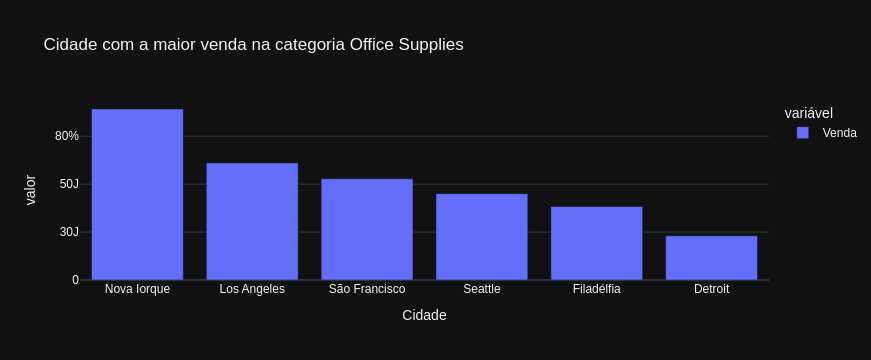

In [156]:
df2=df2.iloc[0:6,:]
graf = px.bar(df2,title='Cidade com a maior venda na categoria Office Supplies',template='plotly_dark')
graf.show()

Pergunta de Negócio 2:Qual o Total de Vendas Por Data do Pedido?

In [18]:
df3 = df.groupby('Order Date')['Sales'].sum()
df3 = df3.sort_values(ascending=False)
df3

Order Date
18/03/2014    28106.716
02/10/2016    18452.972
22/10/2017    15158.877
23/03/2017    14816.068
08/09/2014    14228.428
                ...    
01/10/2014        4.710
24/06/2014        4.272
28/01/2014        3.928
12/07/2017        3.816
19/07/2015        2.025
Name: Sales, Length: 1237, dtype: float64

In [158]:
df3 = pd.DataFrame(df3)
df3 = df3.iloc[0:6,:]
df3

,Sales
Order Date,
18/03/2014,28106.7160
02/10/2016,18452.9720
22/10/2017,15158.8770
23/03/2017,14816.0680
08/09/2014,14228.4280
17/11/2017,13694.8828


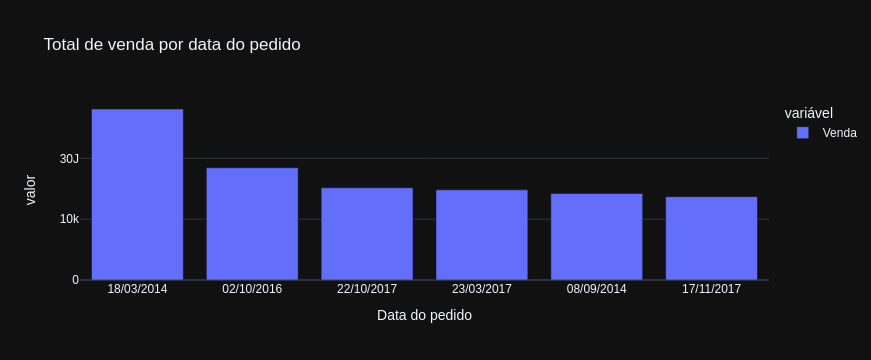

In [159]:
fig = px.bar(df3,title='Total de venda por data do pedido ',template='plotly_dark')
fig.show()

•Pergunta de Negócio 3:
Qual o Total de Vendas por Estado? 
Demonstre o resultado através de um gráfico de barras.

In [39]:
df4 = df.groupby('State')['Sales'].sum()
df4 = pd.DataFrame(df4)
df4

,Sales
State,
Alabama,19510.6400
Arizona,35282.0010
Arkansas,11678.1300
California,457687.6315
Colorado,32108.1180
Connecticut,13384.3570
Delaware,27451.0690
District of Columbia,2865.0200
Florida,89473.7080


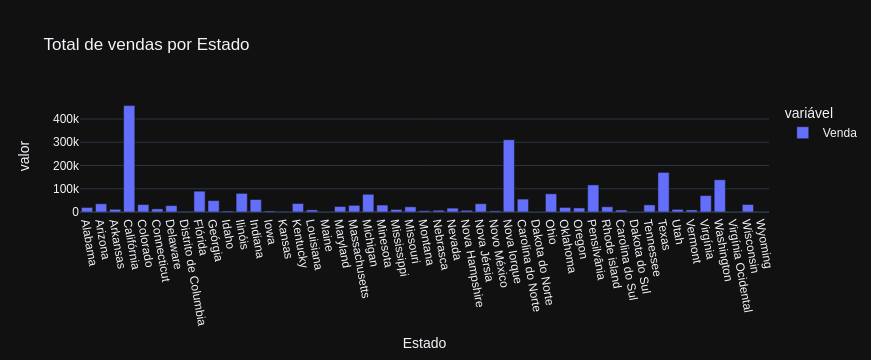

In [173]:
fig1 = px.bar(df4,title='Total de vendas por Estado',template='plotly_dark')
fig1.update_xaxes(title_text='Estado',tickangle=80)
fig1.show()

•Pergunta de Negócio 4:Quais São as 10 Cidades com Maior Total de Vendas? Demonstre o resultado através de um gráfico de barras.

In [56]:
df5 = df.groupby('City')['Sales'].sum()
df5 = pd.DataFrame(df5)
df5 = df5.iloc[0:10,:]
df5 = df5.sort_values(by='Sales',ascending=False)
df5

,Sales
City,
Anaheim,7986.8700
Alexandria,5519.5700
Amarillo,3773.0628
Akron,2729.9860
Albuquerque,2220.1600
Allentown,853.2520
Allen,290.2060
Aberdeen,25.5000
Altoona,20.4510


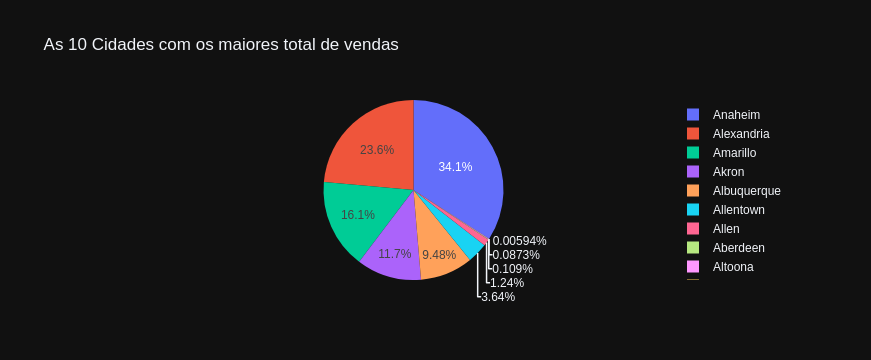

In [161]:
fig2 = px.pie(df5,values='Sales',names=df5.index,title='As 10 Cidades com os maiores total de vendas',template='plotly_dark')
fig2.show()

•Pergunta de Negócio 5:Qual Segmento Teve o Maior Total de Vendas? Demonstre o resultado através de um gráfico de pizza.

In [69]:
df6 = df.groupby('Segment')['Sales'].sum()
df6 = pd.DataFrame(df6)
df6.sort_values(by='Sales',ascending=False)
df6

,Sales
Segment,
Consumer,1.161401e+06
Corporate,7.061464e+05
Home Office,4.296531e+05


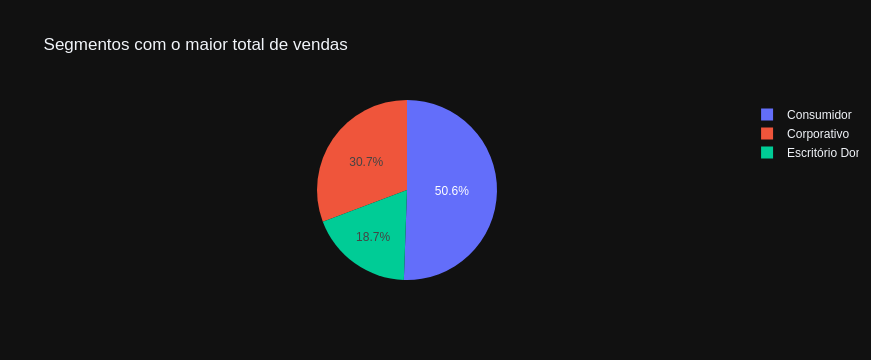

In [164]:
fig3 = px.pie(df6,names=df6.index,values='Sales',title='Segmentos com o maior total de vendas',template='plotly_dark')
fig3

•Pergunta de Negócio 6 (Desafio Nível Baby):Qual o Total de Vendas Por Segmento e Por Ano?

In [99]:
dfcopia = df
dfcopia['Order Date'] = pd.to_datetime(df['Order Date'],format='%d/%m/%Y')
dfcopia['Ano'] = dfcopia['Order Date'].dt.year
dfcopia

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Ano
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0,"41,9136",2016
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0,"219,582",2016
2,3,CA-2016-138688,2016-06-12,16/06/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0,"6,8714",2016
3,4,US-2015-108966,2015-10-11,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,"0,45","-383,031",2015
4,5,US-2015-108966,2015-10-11,18/10/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,"0,2","2,5164",2015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,CA-2014-110422,2014-01-21,23/01/2014,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,"0,2","4,1028",2014
9990,9991,CA-2017-121258,2017-02-26,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,FUR-FU-10000747,Furniture,Furnishings,Tenex B1-RE Series Chair Mats for Low Pile Car...,91.9600,2,0,"15,6332",2017
9991,9992,CA-2017-121258,2017-02-26,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,TEC-PH-10003645,Technology,Phones,Aastra 57i VoIP phone,258.5760,2,"0,2","19,3932",2017
9992,9993,CA-2017-121258,2017-02-26,03/03/2017,Standard Class,DB-13060,Dave Brooks,Consumer,United States,Costa Mesa,...,West,OFF-PA-10004041,Office Supplies,Paper,"It's Hot Message Books with Stickers, 2 3/4"" x 5""",29.6000,4,0,"13,32",2017


In [101]:
df7 = dfcopia.groupby(['Segment','Ano'])['Sales'].sum()
df7 = pd.DataFrame(df7)
df7 = df7.sort_values(by='Sales',ascending=False)
df7


Sales
Segment     Ano              
Consumer    2017  331904.6999
            2016  296863.8992
            2015  266535.9333
            2014  266096.8126
Corporate   2017  241847.8244
            2016  207106.3618
Home Office 2017  159462.7309
Corporate   2015  128757.3069
            2014  128434.8737
Home Office 2016  105235.3370
            2014   89715.8118
            2015   75239.2688

•Pergunta de Negócio 7 (Desafio Nível Júnior):Os gestores da empresa estão considerando conceder diferentes faixas de descontos e gostariam de fazer uma simulação com base na regra abaixo:Se o Valor_Venda for maior que 1000 recebe 15% de desconto. Se o Valor_Venda for menor que 1000 recebe 10% de desconto. Quantas Vendas Receberiam 15% de Desconto?

In [117]:
df8 = df['Sales']
df8 = pd.DataFrame(df8)
df8 = df8.sort_values(by="Sales",ascending=False)
df8

,Sales
2697,22638.480
6826,17499.950
8153,13999.960
2623,11199.968
4190,10499.970
...,...
2106,0.876
4711,0.852
8658,0.836
9292,0.556


In [176]:
df8['Desconto'] = np.where(df['Sales'] > 1000,0.15,0.10)
df8

,Sales,Desconto
2697,22638.480,0.1
6826,17499.950,0.1
8153,13999.960,0.1
2623,11199.968,0.1
4190,10499.970,0.1
...,...,...
2106,0.876,0.1
4711,0.852,0.1
8658,0.836,0.1
9292,0.556,0.1


In [179]:
df8['Desconto'].value_counts()

Desconto
0.10    9526
0.15     468
Name: count, dtype: int64

•Pergunta de Negócio 8 (Desafio Nível Master):Considere Que a Empresa Decida Conceder o Desconto de 15% do Item Anterior. Qual Seria a Média do Valor de Venda Antes e Depois do Desconto?

In [185]:
df8['Vendas_desconto'] = df8['Sales'] - df8['Sales'] * df8['Desconto']
df8

,Sales,Desconto,Vendas_desconto
2697,22638.480,0.1,20374.6320
6826,17499.950,0.1,15749.9550
8153,13999.960,0.1,12599.9640
2623,11199.968,0.1,10079.9712
4190,10499.970,0.1,9449.9730
...,...,...,...
2106,0.876,0.1,0.7884
4711,0.852,0.1,0.7668
8658,0.836,0.1,0.7524
9292,0.556,0.1,0.5004


In [191]:
df_antes = df8.loc[df8['Desconto'] ==0.15,'Sales']
df_antes1 = df_antes.mean()
df_agora = df8.loc[df8['Desconto'] ==0.15,'Vendas_desconto']
df_agora1 = df_agora.mean()

In [195]:
print('Media antes do desconto 15%:',round(df_antes1,2))

Media antes do desconto 15%: 263.98


In [196]:
print('Media depois do desconto 15%:',round(df_agora1,2))

Media depois do desconto 15%: 224.38


 •Pergunta de Negócio 9 (Desafio Nível Master Ninja):Qual o Média de Vendas Por Segmento, Por Ano e Por Mês? Demonstre o resultado através de gráfico de linha.